In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches
import os

from skimage import data
from skimage.feature import Cascade
from skimage import io

import face_recognition
import tensorflow as tf
import cv2
import urllib
import xml.etree.ElementTree as ET
import io

In [3]:
current_path = os.getcwd()
bases_prontas_path = os.path.join("D:\\","FIA","TCC","BASES","Base_crua_com_anotacoes","")
print(bases_prontas_path)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

D:\FIA\TCC\BASES\Base_crua_com_anotacoes\
1 Physical GPUs, 1 Logical GPUs


In [4]:
%matplotlib inline

In [6]:
# img1 = data.astronaut()
# img2 = data.camera()
img3 = face_recognition.load_image_file(bases_prontas_path+"\\imagem_nova13.png")
print(type(img3))

<class 'numpy.ndarray'>


# Face detection using a cascade classifier from skimage

In [43]:
trained_file2 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_profileface.xml").read()
teste = ET.parse(io.BytesIO(trained_file2))
print(type(trained_file2))
# with open("lbpcascade_profileface.xml", "wb") as file:
#     file.write(ET.tostring(trained_file2))
    
# trained_file3 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_frontalface.xml").read()

# trained_file4 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_frontalface_improved.xml").read()


# trained_file5 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_eye.xml").read()

# trained_file6 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml").read()

# trained_file7 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt.xml").read()



# trained_file8 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt2.xml").read()

# trained_file9 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt_tree.xml").read()

# trained_file10 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_default.xml").read()

# trained_file11 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_profileface.xml").read()



ParseError: not well-formed (invalid token): line 50, column 87 (<string>)

In [7]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()
# trained_file2 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_profileface.xml").read()
# trained_file3 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_frontalface.xml").read()
# trained_file4 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/lbpcascades/lbpcascade_frontalface_improved.xml").read()

# trained_file5 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_eye.xml").read()
# trained_file6 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml").read()
# trained_file7 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt.xml").read()

# trained_file8 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt2.xml").read()
# trained_file9 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_alt_tree.xml").read()
# trained_file10 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_default.xml").read()
# trained_file11 = urllib.request.urlopen("https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_profileface.xml").read()



# Initialize the detector cascade.
detector = Cascade(trained_file)

# # https://github.com/opencv/opencv/tree/master/data/lbpcascades
# detector2 = Cascade(trained_file2)
# detector3 = Cascade(trained_file3)
# detector4 = Cascade(trained_file4)
# detector5 = Cascade(trained_file5)
# detector6 = Cascade(trained_file6)
# detector7 = Cascade(trained_file7)
# detector8 = Cascade(trained_file8)
# detector9 = Cascade(trained_file9)
# detector10 = Cascade(trained_file10)
# detector11 = Cascade(trained_file11)

def face_detection_cascade_classifier_from_skimage(img, det = detector):
    return det.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(20, 20),
                                       max_size=(600, 600))

def plot_detections_skimage_cascade(img, detected):
    plt.imshow(img)
    img_desc = plt.gca()
    plt.set_cmap('gray')

    for patch in detected:

        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    plt.show()

In [8]:
# for_img1 = face_detection_cascade_classifier_from_skimage(img1)
# for_img2 = face_detection_cascade_classifier_from_skimage(img2)
for_img3 = face_detection_cascade_classifier_from_skimage(img3)
print(f"detector = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector2)
# print(f"detector2 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector3)
# print(f"detector3 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector4)
# print(f"detector4 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector5)
# print(f"detector5 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector6)
# print(f"detector6 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector7)
# print(f"detector7 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector8)
# print(f"detector8 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector9)
# print(f"detector9 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector10)
# print(f"detector10 = {len(for_img3)}")
# for_img3 = face_detection_cascade_classifier_from_skimage(img3, detector11)
# print(f"detector11 = {len(for_img3)}")

detector = 15


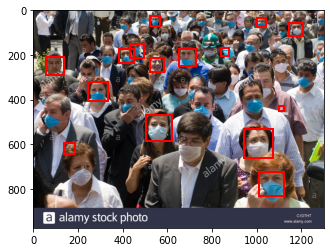

In [9]:
plot_detections_skimage_cascade(img3, for_img3)

# Compara a quantidade de rostos que cada modelo consegue reconhecer
Serão  usadas todas as imagens da base original e também das adicionadas

In [12]:
print(bases_prontas_path)
contador_skimage = 0
image_cortadas = os.path.join(current_path,"only_faces","")
image_list = [i for i in os.listdir(bases_prontas_path) if str(i).endswith('.png')]
total = len([i for i in os.listdir(image_cortadas) if str(i).endswith('.png')])

D:\FIA\TCC\BASES\Base_crua_com_anotacoes\


In [14]:
for foto in image_list:
    image = face_recognition.load_image_file(bases_prontas_path+"\\"+foto)
    contador_skimage += len(face_detection_cascade_classifier_from_skimage(image))

print(f"total de rostos classificados = {total}")
print(f"contador_skimage = {contador_skimage}")


total de rostos classificados = 6821
contador_skimage = 3807
